In [1]:
# Run this cell every time you open it up
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set_palette("Set2")

df = pd.read_csv("results.csv")
df['iterations'] = df['iterations'].div(1000)
df['latency per request'] = (df['latency']*1000*1000)/df['iterations']
df.head()

,run,iterations,type,latency,latency per request
0,0,100.0,Independent Client,0.016866,168.66
1,0,100.0,Independent Client (elevated),0.023113,231.13
2,0,100.0,Client + Server,0.033993,339.93
3,0,100.0,Client + Server (elevated),0.028620,286.20
4,1,100.0,Independent Client,0.047996,479.96


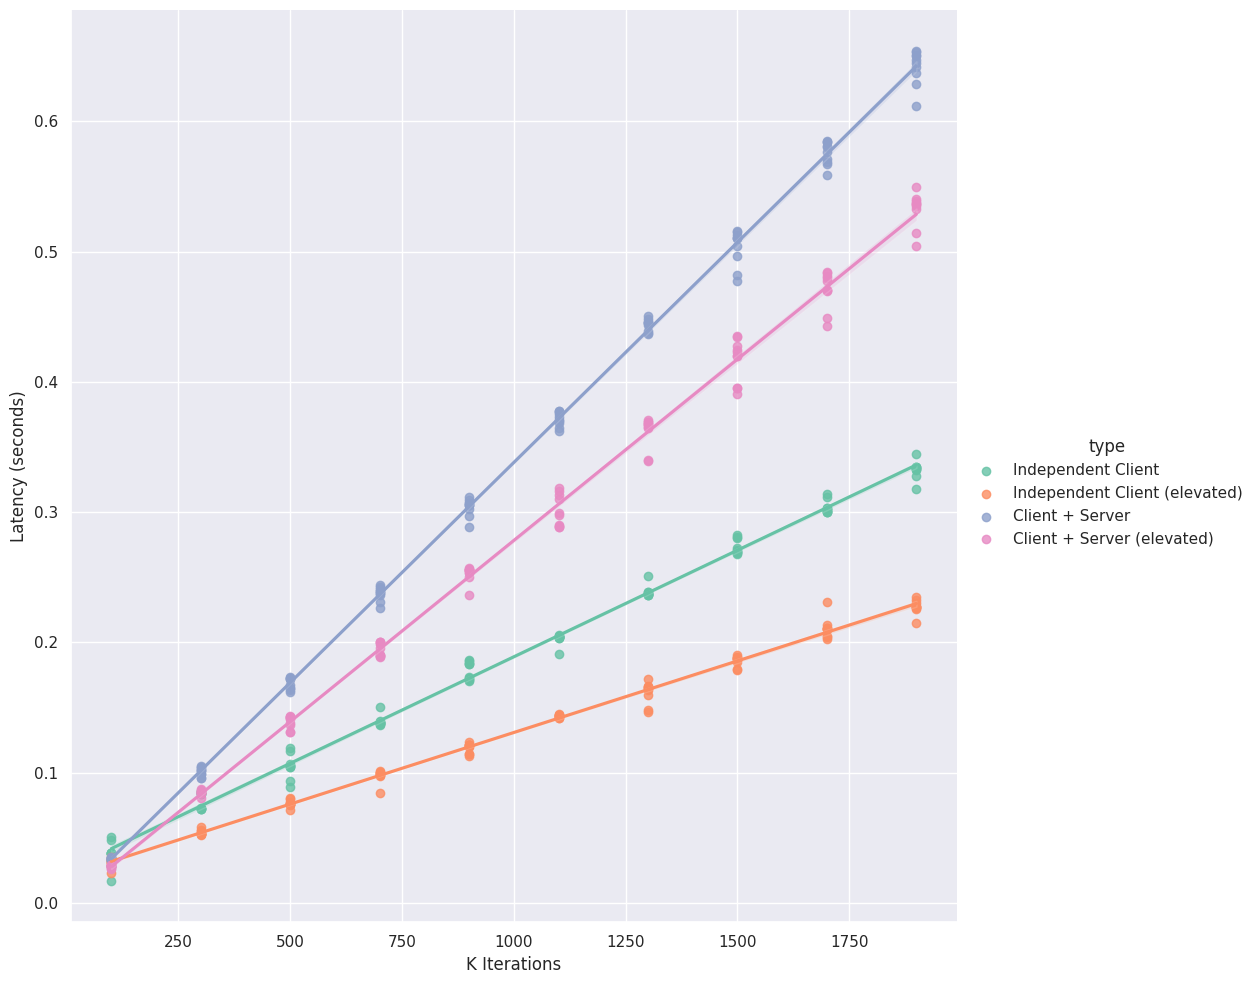

In [2]:
# Visualization for sweep of writes vs latency

p1=sns.lmplot(data=df, x="iterations", y="latency", hue="type",  height=10)
p1.set_axis_labels("K Iterations", "Latency (seconds)")

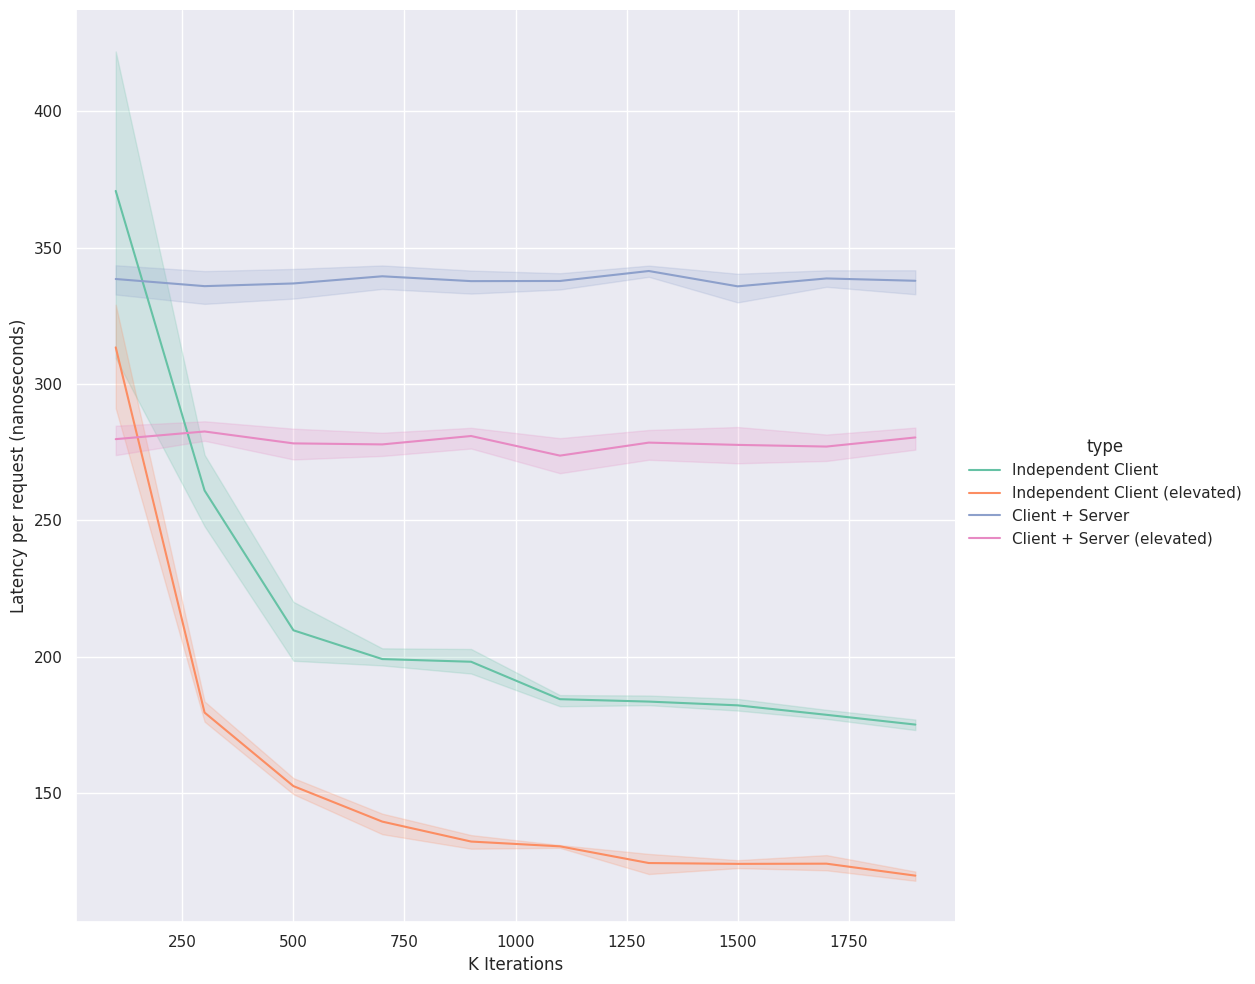

In [3]:
# Visualization for sweep of writes vs latency

p2=sns.relplot(data=df, x="iterations", y="latency per request", hue="type", kind="line",  height=10)
p2.set_axis_labels("K Iterations", "Latency per request (nanoseconds)")

<AxesSubplot: >

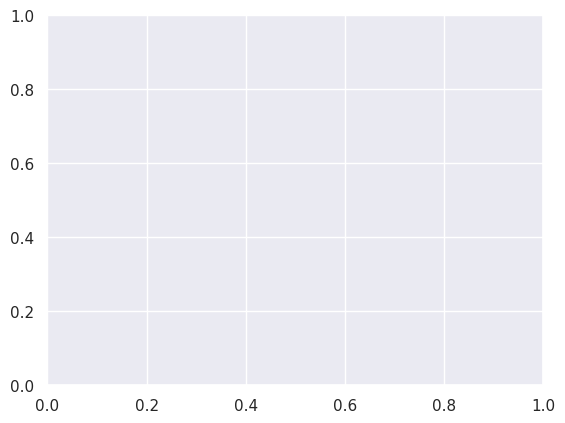

In [4]:
# Visualization for given writes vs latency
iteration = 260 # number of K iterations

df_iteration = df[df['iterations']==iteration]
sns.scatterplot(data=df_iteration, x="run", y="latency per request", hue="type", alpha=0.5, s=100)